<a href="https://colab.research.google.com/github/ashu433/Machine-Learning-Codes-and-Assignment/blob/main/Machine_learning_Book_Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
mnist = fetch_openml('mnist_784', version=1,as_frame=False)

In [30]:
type(mnist)

sklearn.utils._bunch.Bunch

In [31]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [32]:
X,y=mnist['data'],mnist['target']

In [33]:
type(X)

numpy.ndarray

In [34]:
print(f"Shape of input: {X.shape} and shape of the output is: {y.shape}")

Shape of input: (70000, 784) and shape of the output is: (70000,)


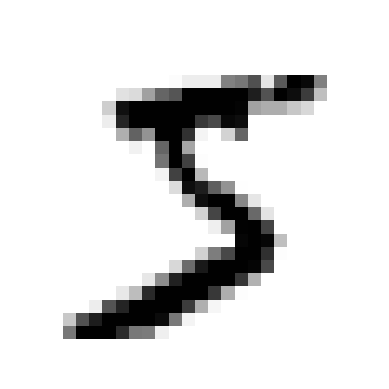

In [35]:
# Select a digit to display (e.g., the first digit)
some_digit = X[0]  # Since `as_frame=False`, this will be a NumPy array

# Reshape the flat image array (784,) into a 28x28 image
some_digit_image = some_digit.reshape(28, 28)

# Plot the image
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [36]:
y[0]

'5'

In [37]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [38]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [39]:
y_train_series=pd.Series(y_train_5)
y_train_series.value_counts()

,count
False,54579
True,5421


In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [42]:
some_digit = X[0].reshape(1, -1)
predicted_digit = sgd_clf.predict(some_digit)

In [43]:
print(f"The predicted digit is: {predicted_digit[0]}")

The predicted digit is: True


In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [45]:
y_predicted_5=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [46]:
confusion_matrix(y_train_5,y_predicted_5)

array([[53892,   687],
       [ 1891,  3530]])

In [50]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [48]:
precision_score(y_train_5,y_predicted_5)

0.8370879772350012

In [49]:
recall_score(y_train_5,y_predicted_5)

0.6511713705958311

In [51]:
f1_score(y_train_5,y_predicted_5)

0.7325171197343847